In [1]:
import numpy as np                         
import matplotlib                          
import matplotlib.pyplot as plt       

import pykat.optics.maps as pkm
from pykat import finesse                 
from pykat.commands import *               
from pykat.optics.maps import *            
from IPython.display import display, HTML

%config InlineBackend.figure_format='svg'
%matplotlib inline
pykat.init_pykat_plotting(dpi=90) 

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
kat = pykat.finesse.kat()
kat.verbose=False
kat.parse("""
l laser 1 0 0 n0
s s0 1 n0 n1

m1 ITM 0.014 3.75e-05 0 n1 n2
s sCav 3994.4692 n2 n3
m1 ETM 5e-06 3.75e-05 3.8 n3 n4

#higher order mode TEM33
tem laser 0 0 0.0 0.0
tem laser 3 3 1.0 0.0

#Gaussian model
cav cavity ITM n2 ETM n3
attr ITM Rc -2679.93
attr ETM Rc 2679.93
#Rc=2679.93 when clipping loss is 1ppm for HG33

ad AD24 2 4 0 n3
ad AD42 4 2 0 n3
ad AD15 1 5 0 n3
ad AD51 5 1 0 n3
ad AD60 6 0 0 n3
ad AD06 0 6 0 n3
ad AD33 3 3 0 n3

maxtem 8

#photodiode and xaxis
pd Pcirc n3
yaxis log abs
""")

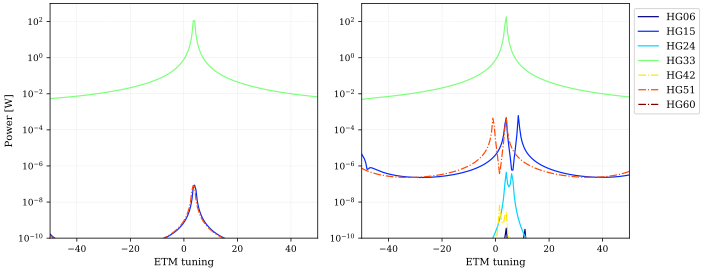

In [10]:
import matplotlib.cm as cm
k1 = kat.deepcopy()
k1.parse("""xaxis ETM phi lin -50 50 200
            map ETM zernikeMapsCrop0.15/Znmmaps/Z22order10phasemap.txt""") # 10nm Z22 map

k2 = kat.deepcopy()
k2.parse("""xaxis ETM phi lin -50 50 200
            map ETM zernikeMapsCrop0.15/Znmmaps/Z22order100phasemap.txt""") # 100nm Z22 map

cols = cm.jet(np.linspace(0,1,7))
fig,ax=plt.subplots(1,2,figsize=(10,4),sharex=True)
out1=k1.run()
out2=k2.run()

jj=0
for n in range(7):
    for m in range(7):
        if n+m==6:
            if n>m:
                lineStyle='-.'
            elif n<m:
                lineStyle='-'
            ax[0].semilogy(out1.x,abs(out1[f'AD{n}{m}'])**2,lineStyle,color=cols[jj],label=f'HG{n}{m}')
            ax[0].set_ylabel('Power [W]')
            ax[0].set_xlabel('ETM tuning')
#            ax[1].set_title('HG33 with 1 [nm] vertical astigmatism(Zernike 22) applied')
            ax[0].set_ylim(1e-10,1e3)
            
            ax[1].semilogy(out2.x,abs(out2[f'AD{n}{m}'])**2,lineStyle,color=cols[jj],label=f'HG{n}{m}')
            ax[1].legend(loc=2,bbox_to_anchor=(1,1))  
#            ax[1].set_title('HG33 with 10 [nm] vertical astigmatism(Zernike 22) applied')
            ax[1].set_xlabel('ETM tuning')
            ax[1].set_ylim(1e-10,1e3)
            jj+=1
plt.tight_layout()
plt.show()

In [12]:
fig.savefig('HG33 with Z22.pdf')